In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rockphypy import EM
from publib import set_style, fix_style

# Read the Excel file
df = pd.read_excel('Wallula.xlsx', sheet_name='Initial')

In [2]:

# Extract columns
DEP = df['DEPTH']
Vp = df['VP']
Vs = df['VS']
GR = df['GR']
RHOB_ = df['RHOB']
Phi = df['Phi']
Sw = df['SW']
K_log_sat = df["K_log"]
G_log = df["G_log"]


# Volume fractions of minerals, samples collected from Wallula Well
plg = 51.78
qtz = 11.48
ort = 6.96
hem = 7.09
dio = 9.40
sph = 3.50
hyp = 7.55
apt = 0.73

total_sum = plg + qtz + ort + hem + dio + sph + hyp + apt

# Normalizing volume fraction
plg_normalized = plg / total_sum
qtz_normalized = qtz / total_sum
ort_normalized = ort / total_sum
hem_normalized = hem / total_sum
dio_normalized = dio / total_sum
sph_normalized = sph / total_sum
hyp_normalized = hyp / total_sum
apt_normalized = apt / total_sum

# Update DataFrame with normalized values
plg = plg_normalized
qtz = qtz_normalized
ort = ort_normalized
hem = hem_normalized
dio = dio_normalized
sph= sph_normalized
hyp = hyp_normalized
apt = apt_normalized
total= plg + qtz + ort + hem + dio + sph + hyp + apt
print(total)

1.0


In [3]:
# Bulk and shear moduli of minerals (Rock Physics Handbook by Tapan Mukerji)
Kf = 2.1

Kplg = 79.5
Gplg = 33.8

Kqtz = 37
Gqtz = 44

Khyp = 101 
Ghyp = 52   

Kort = 46.8  
Gort = 27.3   

Khem = 206.6  
Ghem = 91   

Kdio = 111.2  
Gdio = 63.7  

Ksph = 131.4  
Gsph = 52  

Kapt = 80.65  
Gapt = 47.2  



In [4]:
#  Estimating matrix moduli
v = [plg, qtz, hyp, ort, hem ,dio, sph, apt]
km = [Kplg, Kqtz, Khyp, Kort, Khem ,Kdio, Ksph, Kapt]
gm = [Gplg, Gqtz, Ghyp, Gort, Ghem ,Gdio, Gsph, Gapt]
KU, KL, K = EM.VRH(v,km)
GU, GL, G = EM.VRH(v,gm)
print("Bulk Modulus (K):")
print(K)

print("\nShear Modulus (G):")
print(G)

Bulk Modulus (K):
80.71671390342382

Shear Modulus (G):
41.50923084095074


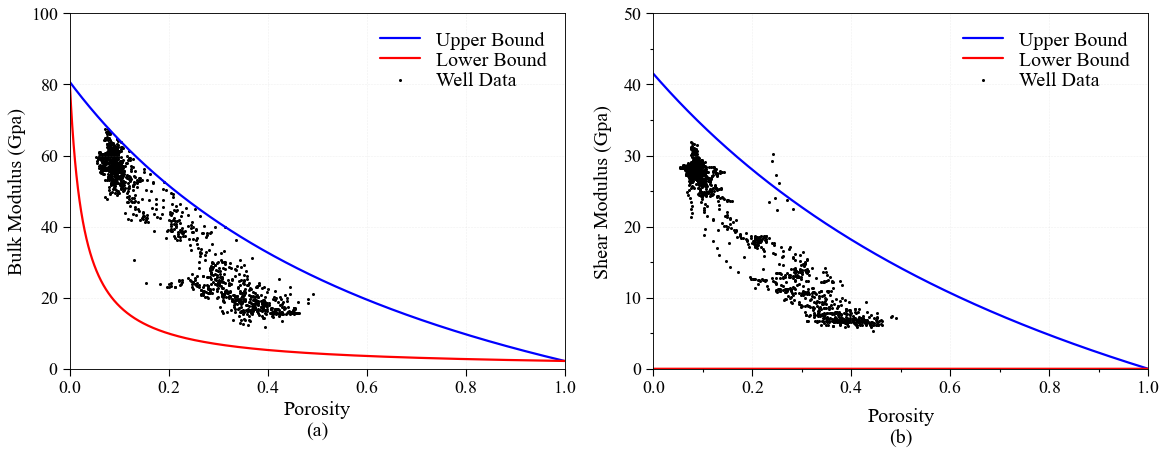

In [ ]:
# Set the style for plots
set_style("article")

f = np.arange(0, 1, 0.0001)

# Calculate K_u and G_u for the upper bound
K_u, G_u = EM.HS(f, 80.71671390342382, 2.2, 41.50923084095074, 0.0000001, bound="upper")

# Calculate K_l and G_l for the lower bound
K_l, G_l = EM.HS(f, 80.71671390342382, 2.2, 41.50923084095074, 0.0000001, bound="lower")


# EM.HS is a function that computes K and G based on phi and other parameters
def compute_K_G(phi):
    Ku,G_u = EM.HS(1-phi, 80.71671390342382, 2.2, 41.50923084095074, 0.0000001, bound="upper")
    Kl,G_l = EM.HS(1-phi, 80.71671390342382, 2.2, 41.50923084095074, 0.0000001, bound="lower")
    return Ku, Kl

df_filtered_list = []

for index, row in df.iterrows():
    phi = row['Phi']
    Ku, Kl = compute_K_G(phi)  # Call function once and get both K and G
    K_log = row['K_log']
    G_log = row['G_log']
    
    # Compare K_log and G_log from the same row to K and G
    if K_log <= Ku and K_log >= Kl:
        df_filtered_list.append(row)

# # Convert the list of filtered rows back to a dataframe
df_filtered = pd.DataFrame(df_filtered_list)

# print(df_filtered)
# Path to your original Excel file
file_path = 'Wallula.xlsx'

# Load the original Excel file
with pd.ExcelFile(file_path) as xls:
    # Create an ExcelWriter object with the original file
    with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        # Write the filtered dataframe to a new sheet
        df_filtered.to_excel(writer, sheet_name='Filtered_Data_HS', index=False)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting K_u and K_l on the first subplot (Bulk Modulus)
axs[0].plot(1-f, K_u, label='Upper Bound', color='blue')
axs[0].plot(1-f, K_l, label='Lower Bound', color='red')
axs[0].scatter(df_filtered['Phi'], df_filtered['K_log'], color='black', label='Well Data', edgecolor='black', s=3)
axs[0].set_xlabel('Porosity\n(a)', fontsize=18)
axs[0].set_ylabel('Bulk Modulus (Gpa)', fontsize=18)
axs[0].legend(fontsize=18)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 100)
axs[0].grid(True)

# Plotting G_u and G_l on the second subplot (Shear Modulus)
axs[1].plot(1-f, G_u, label='Upper Bound', color='blue')
axs[1].plot(1-f, G_l, label='Lower Bound', color='red')
axs[1].scatter(df_filtered['Phi'], df_filtered['G_log'], color='black', label='Well Data', edgecolor='black', s=3)
axs[1].set_xlabel('Porosity\n(b)', fontsize=18)
axs[1].set_ylabel('Shear Modulus (Gpa)', fontsize=18)
axs[1].legend(fontsize=18)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 50)
axs[1].grid(True)

# Adjust layout and save the figure
plt.tight_layout()
fix_style("article")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31240\4292172955.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
C:\Users\Admin\AppData\Local\Temp\ipykernel_31240\4292172955.py:63: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clusters[df_clusters['ZONE'] == cluster][row],
C:\Users\Admin\AppData\Local\Temp\ipykernel_31240\4292172955.py:63: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clusters[df_clusters['ZONE'] == cluster][row],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are

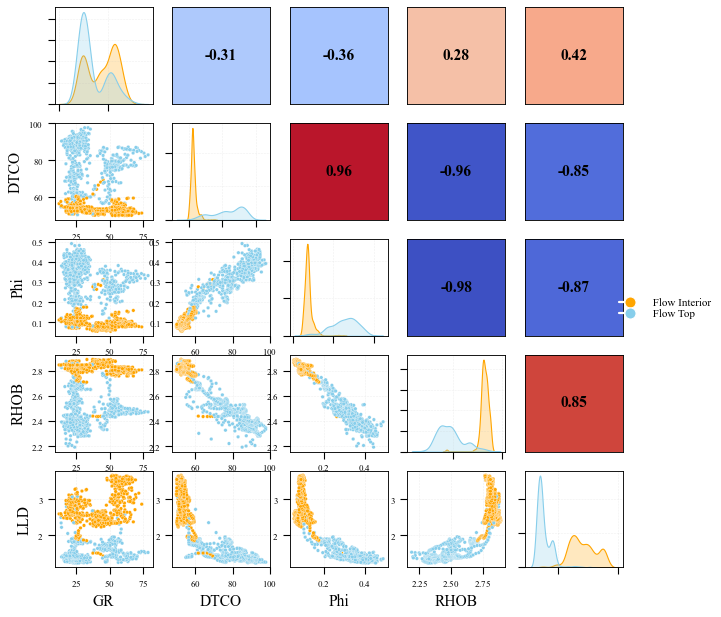

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize
import matplotlib.cm as cm

df = pd.read_excel('Wallula.xlsx', sheet_name='Filtered_Data_HS')
df_clusters = df[["GR", "DTCO", "Phi", "RHOB", "LLD", "ZONE"]].dropna()
df_clusters['LLD'] = np.log10(df_clusters['LLD'])

# Create the correlation matrix
correlation_matrix = df_clusters[["GR", "DTCO", "Phi", "RHOB", "LLD"]].corr()

# Create a new figure for the combined plot
fig, axes = plt.subplots(len(correlation_matrix), len(correlation_matrix), figsize=(10, 10))

zone_colors = {"Flow Interior": "orange", "Flow Top": "skyblue"}
palette = [zone_colors[zone] for zone in df_clusters['ZONE'].unique()]

# Normalizer and colormap for correlation values
norm = Normalize(vmin=-1, vmax=1)
cmap = cm.get_cmap('coolwarm')

# Font sizes
box_text_size = 14  # Font size for text inside boxes
label_font_size = 14  # Font size for x and y labels
tick_font_size = 8  # Font size for tick labels
marker_size = 10    # Marker size for scatter plots

# Plotting
for i, row in enumerate(correlation_matrix.columns):
    for j, col in enumerate(correlation_matrix.columns):
        if i > j:
            # Lower triangular: scatter plots
            sns.scatterplot(ax=axes[i, j], data=df_clusters, x=col, y=row, hue="ZONE", palette=palette, s=marker_size)
            axes[i, j].legend().set_visible(False)
            axes[i, j].tick_params(axis='both', which='major', labelsize=tick_font_size)
            
            # Only add labels for outer subplots
            if j == 0:
                axes[i, j].set_ylabel(row, fontsize=label_font_size)
            else:
                axes[i, j].set_ylabel(None)
            
            if i == len(correlation_matrix.columns) - 1:
                axes[i, j].set_xlabel(col, fontsize=label_font_size)
            else:
                axes[i, j].set_xlabel(None)
        elif i < j:
            # Upper triangular: correlation values with background color
            corr_value = correlation_matrix.loc[row, col]
            color = cmap(norm(corr_value))
            axes[i, j].set_facecolor(color)
            axes[i, j].text(0.5, 0.5, f"{corr_value:.2f}",
                            horizontalalignment='center', verticalalignment='center',
                            fontsize=box_text_size, fontweight='bold', color='black')
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
        else:
            # Diagonal: KDE plots
            for cluster, color in zip(df_clusters['ZONE'].unique(), palette):
                sns.kdeplot(df_clusters[df_clusters['ZONE'] == cluster][row],
                            ax=axes[i, j], shade=True, color=color)
            axes[i, j].tick_params(axis='both', which='major', labelsize=tick_font_size)
            axes[i, j].set_yticklabels([])  # Remove y-axis tick labels
            axes[i, j].set_xticklabels([])  # Remove x-axis tick labels
            axes[i, j].set_ylabel(None)     # Remove y-axis label
            axes[i, j].set_xlabel(None)     # Remove x-axis label
            axes[i, j].legend().set_visible(False)

# Create a legend for the clusters outside the grid of plots
handles = []
labels = []
for cluster, color in zip(df_clusters['ZONE'].unique(), palette):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=marker_size))
    labels.append(f' {cluster}')

fig.legend(handles, labels, loc='center right', fontsize=10)
plt.show()
